# **Waze Churn Project**

### **Overview**
#### The goal of the project is to develop a machine learning model to help predict user churn to improve user retention and grow Waze’s business. The company will be able to optimize user retention strategy, enhance user experience, and make data driven decisions about product development.

# **Inspect and analyze data**
### **Imports and data loading**

In [800]:
# Packages for numerics and dataframes
import numpy as np
import pandas as pd

# This lets see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# Packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for hypothesis testing
from scipy import stats

# Packages for Logistic Regression & Confusion Matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, accuracy_score, recall_score, \
classification_report, f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Packages for data modeling
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, \
RocCurveDisplay, PrecisionRecallDisplay

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets save the fitted models
import pickle

# Remove warnings
import warnings

warnings.filterwarnings('ignore')

from sklearn.inspection import permutation_importance 

In [801]:
# Load dataset into dataframe
df0 = pd.read_csv('waze_dataset.csv')

### **Identify data types and compile summary information**

In [802]:
# Summary information
df0.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748272900,2276,208,0,2628.845068000,1985.775061000,28,19,Android
1,1,retained,133,107,326.896596200,1225,19,64,13715.920550000,3160.472914000,13,11,iPhone
2,2,retained,114,95,135.522926300,2651,0,0,3059.148818000,1610.735904000,14,8,Android
3,3,retained,49,40,67.589221270,15,322,7,913.591123100,587.196542300,7,3,iPhone
4,4,retained,84,68,168.247020100,1562,166,5,3950.202008000,1219.555924000,27,18,Android
5,5,retained,113,103,279.544437300,2637,0,0,901.238698500,439.101397300,15,11,iPhone
6,6,retained,3,2,236.725314200,360,185,18,5249.172828000,726.577204700,28,23,iPhone
7,7,retained,39,35,176.072844600,2999,0,0,7892.052468000,2466.981741000,22,20,iPhone
8,8,retained,57,46,183.532017700,424,0,26,2651.709764000,1594.342984000,25,20,Android
9,9,churned,84,68,244.802114800,2997,72,0,6043.460295000,2341.838528000,7,3,iPhone


In [803]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


1. There are no missing values in the first 10 observations.

2. Datatypes are 3 float variables 'total_sessions', 'driven_km_drives', 'duration_minutes_drives'; 2 object variables: 'label', 'device': the other 8 variables are integer. There are 14,999 rows and 13 columns.

3. The 'label' variable has 14.299 non null values instead of 14,999 thus is missing 700 values  

In [804]:
df0.describe(include='all')

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
count,14999.000000000,14299,14999.000000000,14999.000000000,14999.000000000,14999.000000000,14999.000000000,14999.000000000,14999.000000000,14999.000000000,14999.000000000,14999.000000000,14999
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,retained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
freq,NaN,11763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9672
mean,7499.000000000,NaN,80.633775585,67.281152077,189.964446824,1749.837789186,121.605973732,29.672511501,4039.340920816,1860.976012129,15.537102473,12.179878659,NaN
std,4329.982678949,NaN,80.699064847,65.913872419,136.405128478,1008.513876117,148.121543625,45.394650731,2502.149333796,1446.702287563,9.004655352,7.824036122,NaN
min,0.000000000,NaN,0.000000000,0.000000000,0.220210944,4.000000000,0.000000000,0.000000000,60.441250460,18.282082470,0.000000000,0.000000000,NaN
25%,3749.500000000,NaN,23.000000000,20.000000000,90.661156310,878.000000000,9.000000000,0.000000000,2212.600606500,835.996259900,8.000000000,5.000000000,NaN
50%,7499.000000000,NaN,56.000000000,48.000000000,159.568114700,1741.000000000,71.000000000,9.000000000,3493.858085000,1478.249859000,16.000000000,12.000000000,NaN
75%,11248.500000000,NaN,112.000000000,93.000000000,254.192340750,2623.500000000,178.000000000,43.000000000,5289.861262000,2464.362632000,23.000000000,19.000000000,NaN


### **Null values and summary statistics**

In [805]:
# Isolate rows with null values
df_null = df0[df0['label'].isnull()]

# Display summary stats of rows with null values
df_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000000,700.000000000,700.000000000,700.000000000,700.000000000,700.000000000,700.000000000,700.000000000,700.000000000,700.000000000,700.000000000
mean,7405.584285714,80.837142857,67.798571429,198.483347900,1709.295714286,118.717142857,30.371428571,3935.967028749,1795.123357794,15.382857143,12.125714286
std,4306.900233952,79.987440308,65.271925959,140.561714654,1005.306562392,156.308139944,46.306984437,2443.107120511,1419.242245606,8.772713768,7.626373292
min,77.000000000,0.000000000,0.000000000,5.582648005,16.000000000,0.000000000,0.000000000,290.119810700,66.588493340,0.000000000,0.000000000
25%,3744.500000000,23.000000000,20.000000000,94.056340320,869.000000000,4.000000000,0.000000000,2119.344818250,779.009271275,8.000000000,6.000000000
50%,7443.000000000,56.000000000,47.500000000,177.255924850,1650.500000000,62.500000000,10.000000000,3421.156720500,1414.966278500,15.000000000,12.000000000
75%,11007.000000000,112.250000000,94.000000000,266.058021575,2508.750000000,169.250000000,43.000000000,5166.097372750,2443.955404250,23.000000000,18.000000000
max,14993.000000000,556.000000000,445.000000000,1076.879741000,3498.000000000,1096.000000000,352.000000000,15135.391280000,9746.253023000,31.000000000,30.000000000


In [806]:
# Isolate rows without null values
df_not_null = df0[df0['label'].notnull()]

# Display summary stats of rows without null values
df_not_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000
mean,7503.573117001,80.623819848,67.255822085,189.547408517,1751.822505070,121.747394923,29.638296384,4044.401535156,1864.199794075,15.544653472,12.182530247
std,4331.207621480,80.736501521,65.947295281,136.189764333,1008.663833851,147.713428402,45.350890443,2504.977970380,1448.005047477,9.016088256,7.833835230
min,0.000000000,0.000000000,0.000000000,0.220210944,4.000000000,0.000000000,0.000000000,60.441250460,18.282082470,0.000000000,0.000000000
25%,3749.500000000,23.000000000,20.000000000,90.457732710,878.500000000,10.000000000,0.000000000,2217.319909500,840.181343600,8.000000000,5.000000000
50%,7504.000000000,56.000000000,48.000000000,158.718571400,1749.000000000,71.000000000,9.000000000,3496.545617000,1479.394387000,16.000000000,12.000000000
75%,11257.500000000,111.000000000,93.000000000,253.540449850,2627.500000000,178.000000000,43.000000000,5299.972162000,2466.928876000,23.000000000,19.000000000
max,14998.000000000,743.000000000,596.000000000,1216.154633000,3500.000000000,1236.000000000,415.000000000,21183.401890000,15851.727160000,31.000000000,30.000000000


From a comparison of the summary statistics of the two subsets it appears to be no discernible difference between the two populations, the only difference is in the values of the minimums for driven_km_drives and duration_minutes_drives, but the first quartile values are very close.

### **Null values - device counts**

In [807]:
# Get count of null values by device
df_null['device'].value_counts()

device
iPhone     447
Android    253
Name: count, dtype: int64

447 iPhone users had null values and 253 Android users had null values

In [808]:
# Calculate % of iPhone nulls and Android nulls
df_null['device'].value_counts(normalize = True)

device
iPhone    0.638571429
Android   0.361428571
Name: proportion, dtype: float64

In [809]:
# Calculate % of iPhone users and Android users in full dataset
df0['device'].value_counts(normalize = True)

device
iPhone    0.644842990
Android   0.355157010
Name: proportion, dtype: float64

The percentage of missing values by each device is consistent with their representation in the data overall. There is nothing to suggest a non-random cause of the missing data.

In [810]:
# Calculate counts of churned vs. retained
print(df0['label'].value_counts())
print()
print(df0['label'].value_counts(normalize = True))

label
retained    11763
churned      2536
Name: count, dtype: int64

label
retained   0.822644940
churned    0.177355060
Name: proportion, dtype: float64


This dataset contains 82% retained users and 18% churned users.

In [811]:
# Calculate median values of all columns for churned and retained users
df0.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.500000000,59.000000000,50.000000000,164.339042050,1321.000000000,84.500000000,11.000000000,3652.655666000,1607.183785000,8.000000000,6.000000000
retained,7509.000000000,56.000000000,47.000000000,157.586756300,1843.000000000,68.000000000,9.000000000,3464.684614000,1458.046141000,17.000000000,14.000000000


This offers an interesting snapshot of the two groups, churned vs. retained:

Users who churned averaged ~3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period.

The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.

It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration.

In [812]:
# Create copy of dataset to keep original intact
df1 = df0.copy()

# **Exploratory data analysis**

#### **Retained/churned by device type**

In [813]:
# For each label, calculate the number of Android users and iPhone users
df1[['label', 'device']].value_counts()

label     device 
retained  iPhone     7580
          Android    4183
churned   iPhone     1645
          Android     891
Name: count, dtype: int64

In [814]:
# For each label, calculate the percentage of Android users and iPhone users
df1.groupby('label')['device'].value_counts(normalize = True)

label     device 
churned   iPhone    0.648659306
          Android   0.351340694
retained  iPhone    0.644393437
          Android   0.355606563
Name: proportion, dtype: float64

The ratio of iPhone users and Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.

### **Data exploration and cleaning**

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would will be plotted as a pie chart.

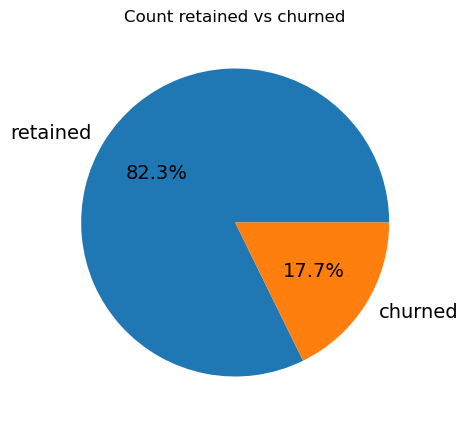

In [815]:
# Pie chart
sizes = df1['label'].value_counts()
labels = sizes.index.tolist()
plt.figure(figsize=(10,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'color':'black','fontsize':14})
plt.title('Count retained vs churned')
plt.show()

Less than 18% of the users churned.

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

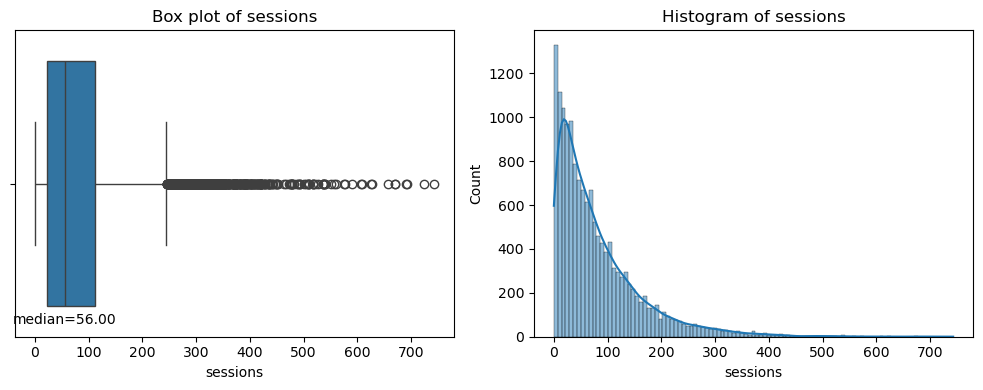

In [816]:
# Box plot
fig, axs = plt.subplots(1,2, figsize=(10,4))
median = round(np.median(df1['sessions']),2)
sns.boxplot(data = df1,
           x = 'sessions', ax = axs[0])
axs[0].set_title('Box plot of sessions')
axs[0].text(median, 0.46 , f'median={median:.2f}', ha='center')

# Histogram
axs[1] = sns.histplot(data = df1,
             x = 'sessions', kde=True, ax = axs[1])
axs[1].set_title('Histogram of sessions')

plt.tight_layout()
plt.show()

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

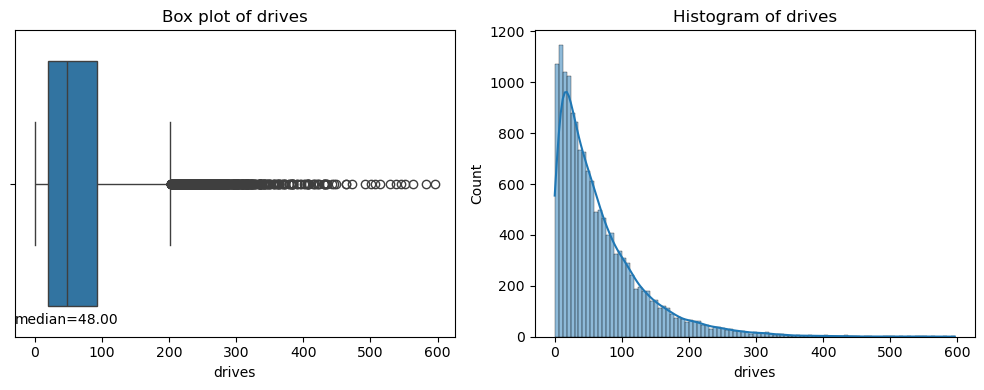

In [817]:
# Box plot
fig, axs = plt.subplots(1,2, figsize=(10,4))
median = round(np.median(df1['drives']),2)
sns.boxplot(data = df1,
           x = 'drives', ax = axs[0])
axs[0].set_title('Box plot of drives')
axs[0].text(median, 0.46 , f'median={median:.2f}', ha='center')

# Histogram
axs[1] = sns.histplot(data = df1,
             x = 'drives', kde=True, ax = axs[1])
axs[1].set_title('Histogram of drives')

plt.tight_layout()
plt.show()

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

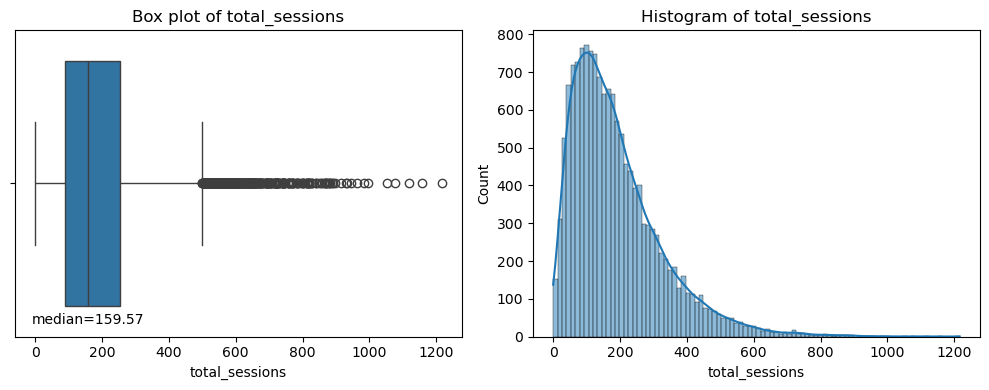

In [818]:
# Box plot
fig, axs = plt.subplots(1,2, figsize=(10,4))
median = round(np.median(df1['total_sessions']),2)
sns.boxplot(data = df1,
           x = 'total_sessions', ax = axs[0])
axs[0].set_title('Box plot of total_sessions')
axs[0].text(median, 0.46 , f'median={median:.2f}', ha='center')

# Histogram
axs[1] = sns.histplot(data = df1,
             x = 'total_sessions', kde=True, ax = axs[1])
axs[1].set_title('Histogram of total_sessions')

plt.tight_layout()
plt.show()

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something you can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

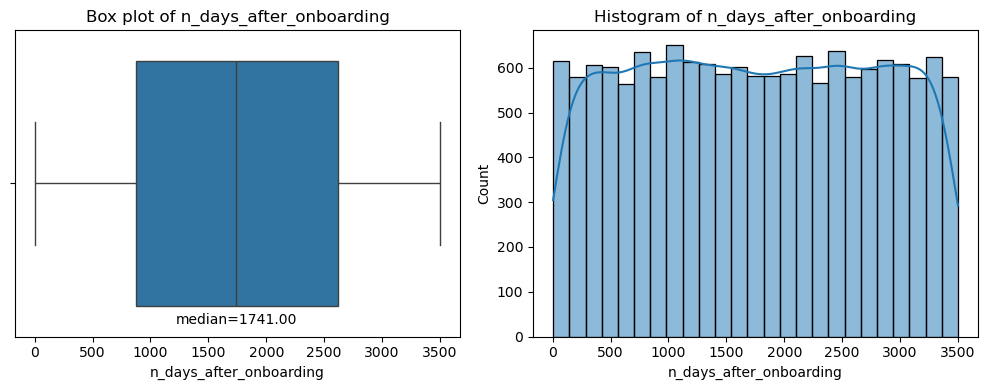

In [819]:
# Box plot
fig, axs = plt.subplots(1,2, figsize=(10,4))
median = round(np.median(df1['n_days_after_onboarding']),2)
sns.boxplot(data = df1,
           x = 'n_days_after_onboarding', ax = axs[0])
axs[0].set_title('Box plot of n_days_after_onboarding')
axs[0].text(median, 0.46 , f'median={median:.2f}', ha = 'center')

# Histogram
axs[1] = sns.histplot(data = df1,
             x = 'n_days_after_onboarding', kde=True, ax = axs[1])
axs[1].set_title('Histogram of n_days_after_onboarding')

plt.tight_layout()
plt.show()

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`total_navigation_fav1`**
_Total navigations since onboarding to the user’s favorite place 1_

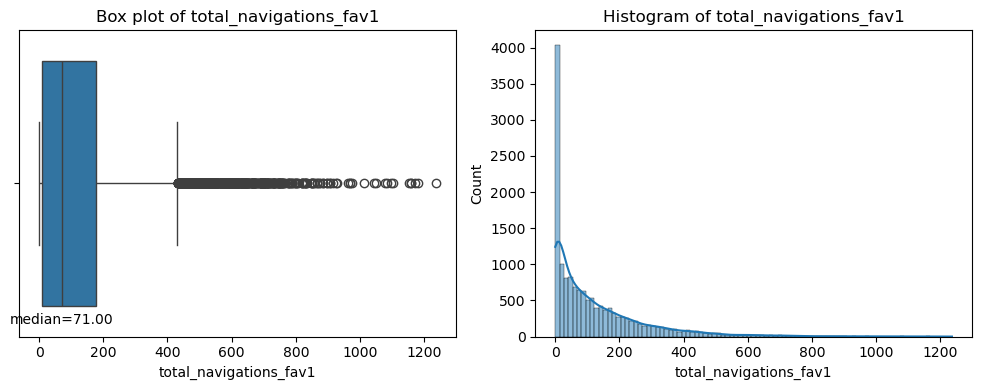

In [820]:
# Box plot
fig, axs = plt.subplots(1,2, figsize=(10,4))
median = round(np.median(df1['total_navigations_fav1']),2)
sns.boxplot(data = df1,
           x = 'total_navigations_fav1', ax = axs[0])
axs[0].set_title('Box plot of total_navigations_fav1')
axs[0].text(median, 0.46 , f'median={median:.2f}', ha='center')

# Histogram
axs[1] = sns.histplot(data = df1,
             x = 'total_navigations_fav1', kde=True, ax = axs[1])
axs[1].set_title('Histogram of total_navigations_fav1')

plt.tight_layout()
plt.show()

Right skewed distribution with many outliers. The median is 71, but the outliers can reach values greater than 1200

#### **`total_navigation_fav2`**
_Total navigations since onboarding to the user’s favorite place 2_

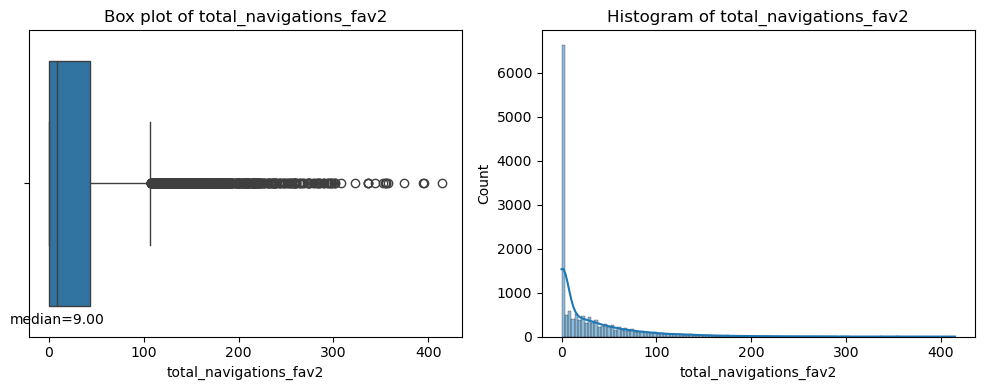

In [821]:
# Box plot
fig, axs = plt.subplots(1,2, figsize=(10,4))
median = round(np.median(df1['total_navigations_fav2']),2)
sns.boxplot(data = df1,
           x = 'total_navigations_fav2', ax = axs[0])
axs[0].set_title('Box plot of total_navigations_fav2')
axs[0].text(median, 0.46 , f'median={median:.2f}', ha='center')

# Histogram
axs[1] = sns.histplot(data = df1,
             x = 'total_navigations_fav2', kde=True, ax = axs[1])
axs[1].set_title('Histogram of total_navigations_fav2')

plt.tight_layout()
plt.show()

Right skewed distribution with many outliers. The median is 9.

#### **`driven_km_drives`**

_Total kilometers driven during the month_

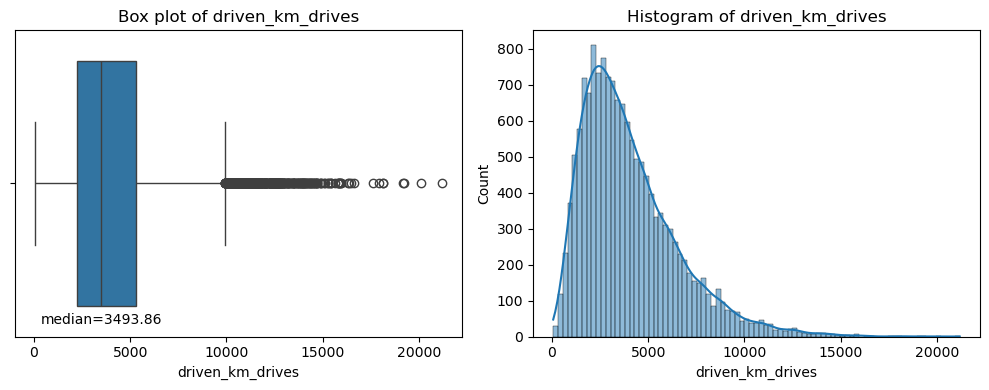

In [822]:
# Box plot
fig, axs = plt.subplots(1,2, figsize=(10,4))
median = round(np.median(df1['driven_km_drives']),2)
sns.boxplot(data = df1,
           x = 'driven_km_drives', ax = axs[0])
axs[0].set_title('Box plot of driven_km_drives')
axs[0].text(median, 0.46 , f'median={median:.2f}', ha='center')

# Histogram
axs[1] = sns.histplot(data = df1,
             x = 'driven_km_drives', kde=True, ax = axs[1])
axs[1].set_title('Histogram of driven_km_drives')

plt.tight_layout()
plt.show()

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. The users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

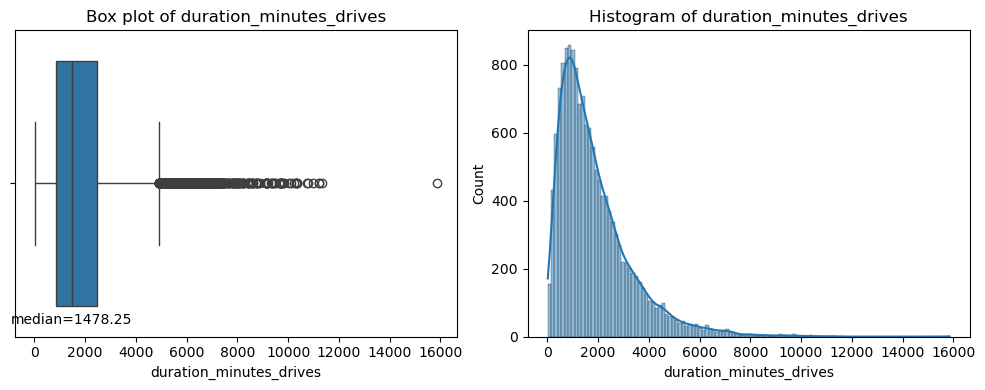

In [823]:
# Box plot
fig, axs = plt.subplots(1,2, figsize=(10,4))
median = round(np.median(df1['duration_minutes_drives']),2)
sns.boxplot(data = df1,
           x = 'duration_minutes_drives', ax = axs[0])
axs[0].set_title('Box plot of duration_minutes_drives')
axs[0].text(median, 0.46 , f'median={median:.2f}', ha='center')

# Histogram
axs[1] = sns.histplot(data = df1,
             x = 'duration_minutes_drives', kde=True, ax = axs[1])
axs[1].set_title('Histogram of duration_minutes_drives')

plt.tight_layout()
plt.show()

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

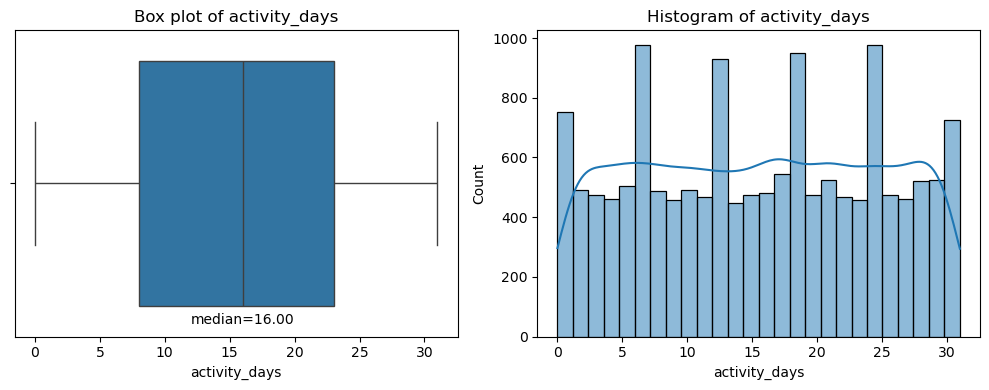

In [824]:
# Box plot
fig, axs = plt.subplots(1,2, figsize=(10,4))
median = round(np.median(df1['activity_days']),2)
sns.boxplot(data = df1,
           x = 'activity_days', ax = axs[0])
axs[0].set_title('Box plot of activity_days')
axs[0].text(median, 0.46 , f'median={median:.2f}', ha='center')

# Histogram
axs[1] = sns.histplot(data = df1,
             x = 'activity_days', kde=True, ax = axs[1])
axs[1].set_title('Histogram of activity_days')

plt.tight_layout()
plt.show()

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which you might think would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

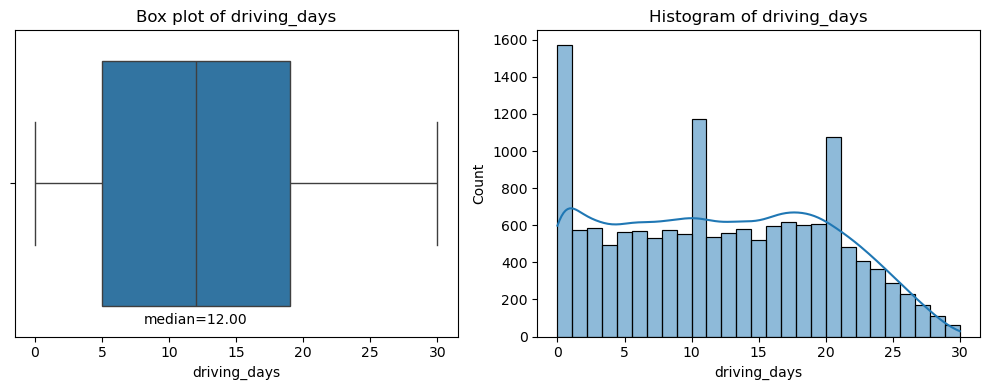

In [825]:
# Box plot
fig, axs = plt.subplots(1,2, figsize=(10,4))
median = round(np.median(df1['driving_days']),2)
sns.boxplot(data = df1,
           x = 'driving_days', ax = axs[0])
axs[0].set_title('Box plot of driving_days')
axs[0].text(median, 0.46 , f'median={median:.2f}', ha='center')

# Histogram
axs[1] = sns.histplot(data = df1,
             x = 'driving_days', kde=True, ax = axs[1])
axs[1].set_title('Histogram of driving_days')

plt.tight_layout()
plt.show()

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day.

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so there is no need to plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

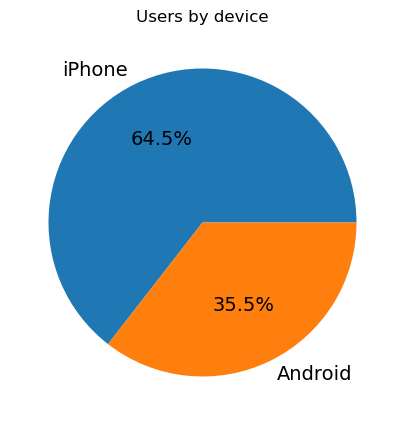

In [826]:
# Pie chart
sizes = df1['device'].value_counts()
labels = sizes.index.tolist()
plt.figure(figsize=(10,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'color':'black','fontsize':14})
plt.title('Users by device')
plt.show()

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, we can plot them together on a single histogram.

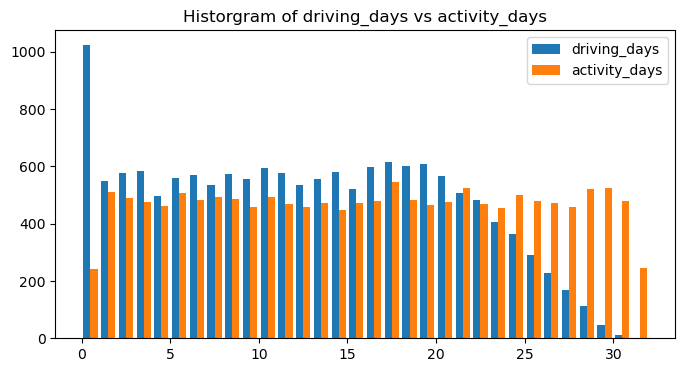

In [827]:
# Histogram
plt.figure(figsize=(8,4))
plt.hist([df1['driving_days'], df1['activity_days']], bins=range(0,33), label = ['driving_days','activity_days'])
plt.title('Historgram of driving_days vs activity_days')
plt.legend()
plt.show()



This chart could be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [828]:
print('Maximum number of driving_days:', df1['driving_days'].max())
print('Maximum number of activity_days:', df1['activity_days'].max())

Maximum number of driving_days: 30
Maximum number of activity_days: 31


Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

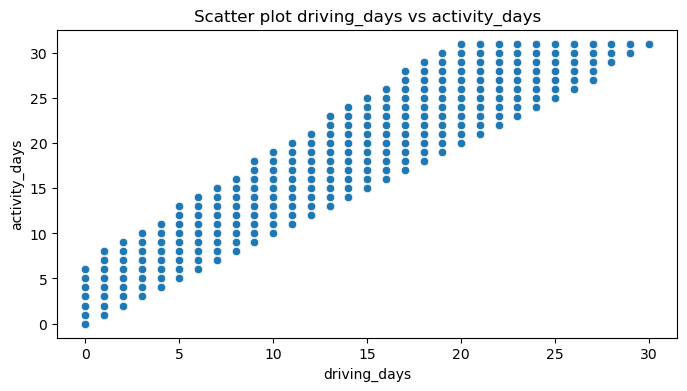

In [829]:
# Scatter plot
plt.figure(figsize=(8,4))
sns.scatterplot(data=df1, x='driving_days', y='activity_days')
plt.title('Scatter plot driving_days vs activity_days')
plt.show()

There is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

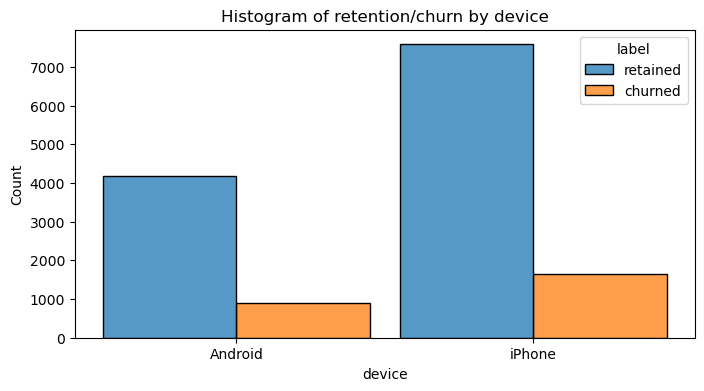

In [830]:
# Histogram
plt.figure(figsize=(8,4))
sns.histplot(data=df1, x = 'device', hue = 'label', multiple='dodge', shrink=0.9)
plt.title('Histogram of retention/churn by device')
plt.show()

The proportion of churned users to retained users is consistent between device types.

#### **`km_per_driving_day`**

In [831]:
# New column in df1 called `km_per_driving_day`
df1['km_per_driving_day'] = df1['driven_km_drives'] / df1['driving_days']

# describe() on `km_per_driving_day` column
df1['km_per_driving_day'].describe()


count   14999.000000000
mean                inf
std                 NaN
min         3.022062523
25%       167.280413750
50%       323.145937900
75%       757.925667800
max                 inf
Name: km_per_driving_day, dtype: float64

The mean value is infinity, the standard deviation is NaN, and the max value is infinity.

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

In [832]:
# Convert infinite values to zero
df1['km_per_driving_day'].replace([np.inf, -np.inf], 0, inplace=True)

# Confirm that it worked
df1['km_per_driving_day'].describe()

count   14999.000000000
mean      578.963113412
std      1030.094384227
min         0.000000000
25%       136.238895358
50%       272.889272087
75%       558.686918212
max     15420.234110000
Name: km_per_driving_day, dtype: float64

In [833]:
# Group by `label`, calculate the median, and isolate for km per driving day
df1.groupby('label').median(numeric_only=True)[['km_per_driving_day']]

,km_per_driving_day
label,
churned,407.597933533
retained,256.056187200


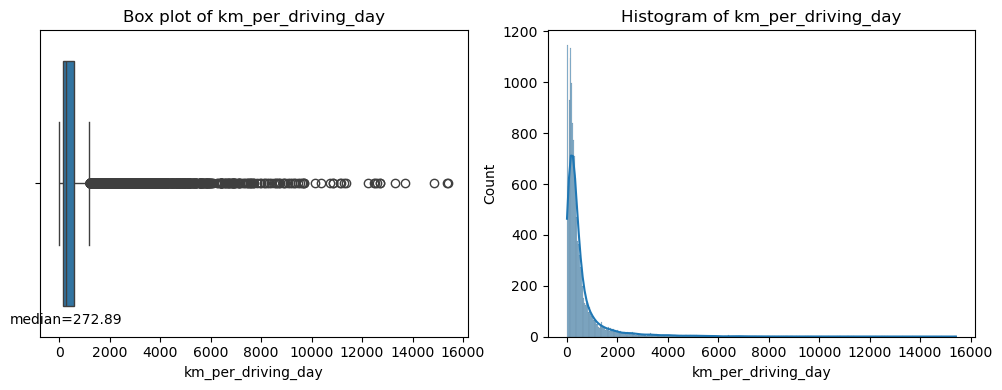

In [834]:
# Box plot
fig, axs = plt.subplots(1,2, figsize=(10,4))
median = round(np.median(df1['km_per_driving_day']),2)
sns.boxplot(data = df1,
           x = 'km_per_driving_day', ax = axs[0])
axs[0].set_title('Box plot of km_per_driving_day')
axs[0].text(median, 0.46 , f'median={median:.2f}', ha='center')

# Histogram
axs[1] = sns.histplot(data = df1,
             x = 'km_per_driving_day', kde=True, ax = axs[1])
axs[1].set_title('Histogram of km_per_driving_day')

plt.tight_layout()
plt.show()

#### **Retention by kilometers driven per driving day**

The maximum value of km_per_driving_day is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km.

The histogram below of the new `km_per_driving_day` column, disregards those users with values greater than 1,200 km.

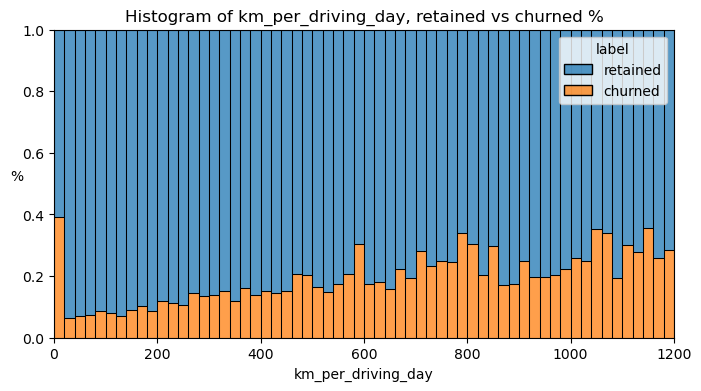

In [835]:
# Histogram
plt.figure(figsize=(8,4))
sns.histplot(df1, bins=range(0,1201,20), x = 'km_per_driving_day', hue = 'label', multiple = 'fill')
plt.title('Histogram of km_per_driving_day, retained vs churned %')
plt.ylabel('%', rotation=0)
plt.show()

The churn rate tends to increase as the mean daily distance driven increases.

#### **Churn rate per number of driving days**

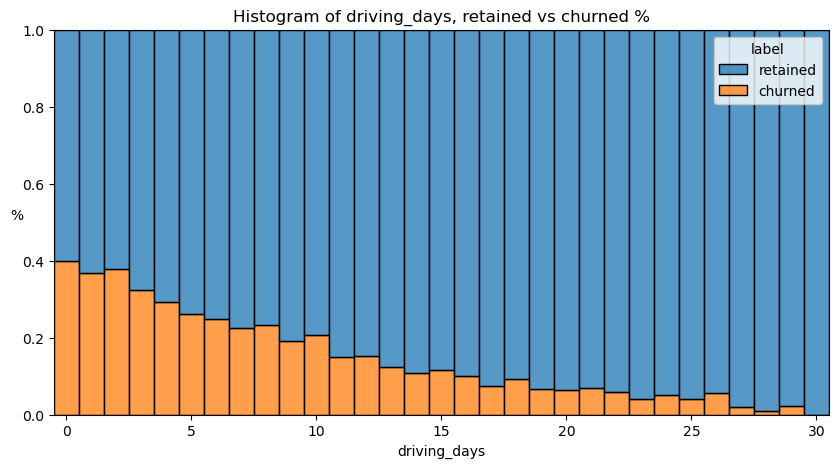

In [836]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(df1, bins=range(1,32),
             x = 'driving_days', hue = 'label', multiple = 'fill', discrete=True)
plt.title('Histogram of driving_days, retained vs churned %')
plt.ylabel('%', rotation=0)
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

In [837]:
percent_sessions_last_month = df1['sessions'] / df1['total_sessions']
percent_sessions_last_month.describe()

count   14999.000000000
mean        0.449255338
std         0.286918629
min         0.000000000
25%         0.196221449
50%         0.423097030
75%         0.687216256
max         1.530637065
dtype: float64

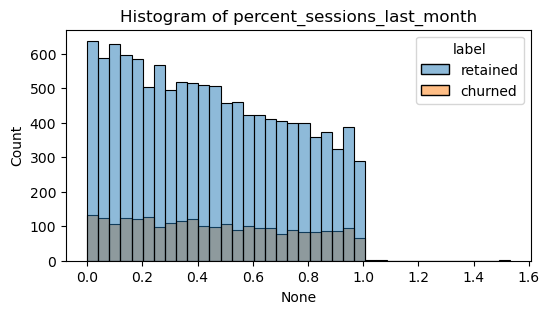

In [838]:
# Histogram
plt.figure(figsize=(6,3))
sns.histplot(x = percent_sessions_last_month, hue=df1['label'], multiple='layer')
plt.title('Histogram of percent_sessions_last_month')
plt.show()

In [839]:
# median time since onboarding in years
df1['n_days_after_onboarding'].median()/365

4.76986301369863

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years. There are also some values which are obviously errors because they represent a percentage greater than 100%.

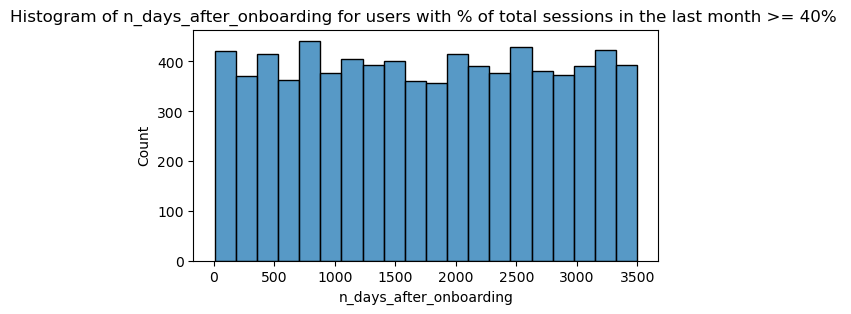

In [840]:
# Filter data for users with >= 40% sessions
filtered_data = df1[percent_sessions_last_month >= 0.40]

# Create histogram using filtered data
plt.figure(figsize=(6, 3))
sns.histplot(x='n_days_after_onboarding', data=filtered_data)  # Pass data directly
plt.title('Histogram of n_days_after_onboarding for users with % of total sessions in the last month >= 40% ')
plt.show()

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

#### **Drives per driving day**

In [841]:
drives_per_driving_day = df1['drives'] / df1['driving_days']

# Group by `label`, calculate the median, and isolate for drives per driving day
df1.assign(drives_per_driving_day = df1['drives'] / df1['driving_days']
           ).groupby('label').median(numeric_only=True)['drives_per_driving_day']

label
churned    10.000000000
retained    4.062500000
Name: drives_per_driving_day, dtype: float64

The median user who churned drove 698 kilometers each day they drove last month, which is almost ~140% the per-drive-day distance of retained users. The median churned user had a similarly disproportionate number of drives per drive day compared to retained users.

It is clear from these figures that, regardless of whether a user churned or not, the users represented in this data are serious drivers! It would probably be safe to assume that this data does not represent typical drivers at large. Perhaps the data&mdash;and in particular the sample of churned users&mdash;contains a high proportion of long-haul truckers.

In consideration of how much these users drive, it would be worthwhile to recommend to Waze that they gather more data on these super-drivers. It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter.

#### **`professional_driver`**
 A new, binary feature that is a 1 for users who had 60 or more drives and drove on 15+ days in the last month. The objective is to create a new feature that separates professional drivers from other drivers.

In [842]:
# New `professional_driver` column
df1['professional_driver'] = np.where((df1['drives']>=60) & (df1['driving_days']>=15), 1, 0)

In [843]:
# Check count of professionals and non-professionals
print(df1['professional_driver'].value_counts())

# Check in-class churn rate
df1.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver
0    12405
1     2594
Name: count, dtype: int64


professional_driver  label   
0                    retained   0.801202269
                     churned    0.198797731
1                    retained   0.924437299
                     churned    0.075562701
Name: proportion, dtype: float64

The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. 

#### **`km_per_drive`**
New column that represents the mean number of kilometers per drive made in the last month for each user.

In [844]:
# Add a column to df1 called `km_per_drive`
df1['km_per_drive'] = df1['driven_km_drives'] / df1['drives']

df1['km_per_drive'].describe()

count   14999.000000000
mean                inf
std                 NaN
min         1.008775259
25%        33.230647460
50%        74.880064889
75%       185.466720353
max                 inf
Name: km_per_drive, dtype: float64

In [845]:
# Convert infinite values to zero in 'km_per_drive' column
df1['km_per_drive'] = df1['km_per_drive'].replace([np.inf, -np.inf], 0)
df1['km_per_drive'].describe()

count   14999.000000000
mean      232.817945872
std       620.622351476
min         0.000000000
25%        32.424300643
50%        72.854342524
75%       179.347526658
max     15777.426560000
Name: km_per_drive, dtype: float64

In [846]:
# Group by `label`, calculate the median, and isolate for km per drive
df1.groupby('label').median(numeric_only=True)[['km_per_drive']]

,km_per_drive
label,
churned,72.771938880
retained,73.006576036


The median retained user drove slightly more kilometer per drive than the median churned user.

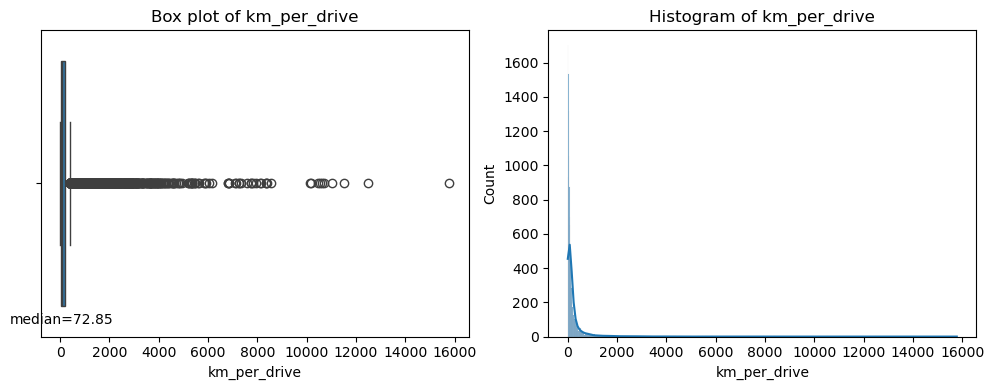

In [847]:
# Box plot
fig, axs = plt.subplots(1,2, figsize=(10,4))
median = round(np.median(df1['km_per_drive']),2)
sns.boxplot(data = df1,
           x = 'km_per_drive', ax = axs[0])
axs[0].set_title('Box plot of km_per_drive')
axs[0].text(median, 0.46 , f'median={median:.2f}', ha='center')

# Histogram
axs[1] = sns.histplot(data = df1,
             x = 'km_per_drive', kde=True, ax = axs[1])
axs[1].set_title('Histogram of km_per_drive')

plt.tight_layout()
plt.show()

# **Hypothesis testing**
#### **Two-sample hyphotesis test**
_Goal: analyze if there is a statistically significant difference in the mean amount of rides between iPhone® and Android™ users_

### **One-hot encoding `device`**

In [848]:
# 1. Create `map_dictionary`
map_dictionary = {'iPhone': 1,
                 'Android': 0}
# 2. Create new `device_type` column
df1['device2'] = df1['device']

# 3. Map the new column to the dictionary
df1['device2'] = df1['device2'].map(map_dictionary)
df1['device2'].head()

0    0
1    1
2    0
3    1
4    0
Name: device2, dtype: int64

In [849]:
average_drives_iPhone = df1[df1['device2'] == 1]['drives'].mean()
average_drives_Android = df1[df1['device2'] == 0]['drives'].mean()

print(average_drives_iPhone)
print()
print(average_drives_Android)

67.85907775020678

66.23183780739629


Based on the averages shown, it appears that drivers who use an iPhone device to interact with the application have a higher number of drives on average. However, this difference might arise from random sampling, rather than being a true difference in the number of drives.

### **Hypothesis test**


> $H_0$ : there is no difference in the mean number of drives between iPhone and Android users

> $H_1$ : the mean number of drives are different between iPhone and Android users

> $Alpha$ : significance level  5%

In [850]:
# 1. Isolate the `drives` column for iPhone users.
drives_iPhone = df1['drives'][df1['device2']==1]

# 2. Isolate the `drives` column for Android users.
drives_Android = df1['drives'][df1['device2']==0]

# 3. Perform the t-test
stats.ttest_ind(a=drives_iPhone, b=drives_Android, equal_var = False)

TtestResult(statistic=1.463523206885235, pvalue=0.143351972680206, df=11345.066049381952)

The p-value is 15% which is higher than the 5% significance level, thus we fail to reject the null hypothesis and we conclude that there is no statistically significant difference in the mean number of drives between iPhone and Android users.


# **Regression modeling**
### **EDA (continuation)**

In [851]:
# remove the ID column since not needed for the analysis
df1 = df1.drop('ID', axis=1)

### **Preparing variables**
#### **Remove missing values**

In [852]:
# Drop rows with missing data in `label` column
df1 = df1.dropna(subset=['label'])

In [853]:
df1.describe(include='all')

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver,km_per_drive,device2
count,14299,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299,14299.000000000,14299.000000000,14299.000000000,14299.000000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,retained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone,NaN,NaN,NaN,NaN
freq,11763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9225,NaN,NaN,NaN,NaN
mean,NaN,80.623819848,67.255822085,189.547408517,1751.822505070,121.747394923,29.638296384,4044.401535156,1864.199794075,15.544653472,12.182530247,NaN,581.942399205,0.173998182,232.269196575,0.645150010
std,NaN,80.736501521,65.947295281,136.189764333,1008.663833851,147.713428402,45.350890443,2504.977970380,1448.005047477,9.016088256,7.833835230,NaN,1038.254509215,0.379121176,616.197408609,0.478484572
min,NaN,0.000000000,0.000000000,0.220210944,4.000000000,0.000000000,0.000000000,60.441250460,18.282082470,0.000000000,0.000000000,NaN,0.000000000,0.000000000,0.000000000,0.000000000
25%,NaN,23.000000000,20.000000000,90.457732710,878.500000000,10.000000000,0.000000000,2217.319909500,840.181343600,8.000000000,5.000000000,NaN,136.168003061,0.000000000,32.486524041,0.000000000
50%,NaN,56.000000000,48.000000000,158.718571400,1749.000000000,71.000000000,9.000000000,3496.545617000,1479.394387000,16.000000000,12.000000000,NaN,273.301011880,0.000000000,72.947058603,1.000000000
75%,NaN,111.000000000,93.000000000,253.540449850,2627.500000000,178.000000000,43.000000000,5299.972162000,2466.928876000,23.000000000,19.000000000,NaN,558.018760868,0.000000000,179.347526658,1.000000000


#### **Encode categorical variables**

In [854]:
# Create binary `label2` column
df1['label2'] = np.where(df1['label']=='churned', 1, 0)
df1[['label', 'label2']].head()

,label,label2
0,retained,0
1,retained,0
2,retained,0
3,retained,0
4,retained,0


### **Determine whether assumptions have been met**
Assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, we can assume that observations are independent for this project.

The second assumption has already been addressed.

The last assumption will be verified after modeling.

#### **Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

In [855]:
# Create new dataframe (copy of df1) for Logistic regression with no outliers
df2 = df1.copy()

def outliers(x):
    percentile_95 = df2[x].quantile(0.95)
    df2[x] = np.where(df2[x]>percentile_95, percentile_95, df2[x])
    print('{:>25}  percentile_95: {}'.format(x,percentile_95))

In [856]:
df2.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,km_per_drive,device2,label2
count,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000
mean,80.623819848,67.255822085,189.547408517,1751.822505070,121.747394923,29.638296384,4044.401535156,1864.199794075,15.544653472,12.182530247,581.942399205,0.173998182,232.269196575,0.645150010,0.177355060
std,80.736501521,65.947295281,136.189764333,1008.663833851,147.713428402,45.350890443,2504.977970380,1448.005047477,9.016088256,7.833835230,1038.254509215,0.379121176,616.197408609,0.478484572,0.381982260
min,0.000000000,0.000000000,0.220210944,4.000000000,0.000000000,0.000000000,60.441250460,18.282082470,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
25%,23.000000000,20.000000000,90.457732710,878.500000000,10.000000000,0.000000000,2217.319909500,840.181343600,8.000000000,5.000000000,136.168003061,0.000000000,32.486524041,0.000000000,0.000000000
50%,56.000000000,48.000000000,158.718571400,1749.000000000,71.000000000,9.000000000,3496.545617000,1479.394387000,16.000000000,12.000000000,273.301011880,0.000000000,72.947058603,1.000000000,0.000000000
75%,111.000000000,93.000000000,253.540449850,2627.500000000,178.000000000,43.000000000,5299.972162000,2466.928876000,23.000000000,19.000000000,558.018760868,0.000000000,179.347526658,1.000000000,0.000000000
max,743.000000000,596.000000000,1216.154633000,3500.000000000,1236.000000000,415.000000000,21183.401890000,15851.727160000,31.000000000,30.000000000,15420.234110000,1.000000000,15777.426560000,1.000000000,1.000000000


In [857]:
outliers('sessions')
outliers('drives')
outliers('total_sessions')
outliers('total_navigations_fav1')
outliers('total_navigations_fav2')
outliers('driven_km_drives')
outliers('duration_minutes_drives')
outliers('km_per_drive')
outliers('km_per_driving_day')

                 sessions  percentile_95: 243.0
                   drives  percentile_95: 200.0
           total_sessions  percentile_95: 455.4394923899998
   total_navigations_fav1  percentile_95: 422.0
   total_navigations_fav2  percentile_95: 124.0
         driven_km_drives  percentile_95: 8898.716274999999
  duration_minutes_drives  percentile_95: 4668.180091799999
             km_per_drive  percentile_95: 913.8787793271415
       km_per_driving_day  percentile_95: 2258.494484349992


In [858]:
df2.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,km_per_drive,device2,label2
count,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000
mean,76.539688090,63.964682845,183.717304114,1751.822505070,114.562766627,27.187215889,3944.558630698,1792.911210206,15.544653472,12.182530247,484.488544453,0.173998182,168.147169214,0.645150010,0.177355060
std,67.243178101,55.127927093,118.720520232,1008.663833851,124.378549874,36.715302206,2218.358258394,1224.329759224,9.016088256,7.833835230,570.872327574,0.379121176,232.903898691,0.478484572,0.381982260
min,0.000000000,0.000000000,0.220210944,4.000000000,0.000000000,0.000000000,60.441250460,18.282082470,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
25%,23.000000000,20.000000000,90.457732710,878.500000000,10.000000000,0.000000000,2217.319909500,840.181343600,8.000000000,5.000000000,136.168003061,0.000000000,32.486524041,0.000000000,0.000000000
50%,56.000000000,48.000000000,158.718571400,1749.000000000,71.000000000,9.000000000,3496.545617000,1479.394387000,16.000000000,12.000000000,273.301011880,0.000000000,72.947058603,1.000000000,0.000000000
75%,111.000000000,93.000000000,253.540449850,2627.500000000,178.000000000,43.000000000,5299.972162000,2466.928876000,23.000000000,19.000000000,558.018760868,0.000000000,179.347526658,1.000000000,0.000000000
max,243.000000000,200.000000000,455.439492390,3500.000000000,422.000000000,124.000000000,8898.716275000,4668.180091800,31.000000000,30.000000000,2258.494484350,1.000000000,913.878779327,1.000000000,1.000000000


#### **Multicollinearity assumption**

In [859]:
# Generate a correlation matrix
df2.corr(method='pearson', numeric_only = True)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,km_per_drive,device2,label2
sessions,1.000000000,0.996942082,0.597188896,0.007100551,0.001858344,0.008535951,0.002995621,-0.004544928,0.025112540,0.020293782,-0.007663793,0.443653645,-0.534142417,0.012704184,0.034911384
drives,0.996942082,1.000000000,0.595284744,0.006939867,0.001057984,0.009505438,0.003444555,-0.003889057,0.024356902,0.019607857,-0.007190117,0.444425336,-0.538829310,0.011684457,0.035865416
total_sessions,0.597188896,0.595284744,1.000000000,0.006595708,0.000187387,0.010371196,0.001016073,-0.000337568,0.015754675,0.012952566,-0.008281648,0.254432506,-0.311641643,0.012138111,0.024568339
n_days_after_onboarding,0.007100551,0.006939867,0.006595708,1.000000000,-0.002449617,-0.004967629,-0.004652392,-0.010167180,-0.009418311,-0.007321340,0.010836871,0.003769746,0.002590906,-0.011299322,-0.129262792
total_navigations_fav1,0.001858344,0.001057984,0.000187387,-0.002449617,1.000000000,0.002866156,-0.007368072,0.005645525,0.010902417,0.010419486,-0.001296634,-0.000224206,-0.010346519,-0.001315661,0.052322436
total_navigations_fav2,0.008535951,0.009505438,0.010371196,-0.004967629,0.002866156,1.000000000,0.003559375,-0.003008846,-0.004425490,0.001999645,-0.003102878,0.007125890,-0.004824304,-0.000274965,0.015031746
driven_km_drives,0.002995621,0.003444555,0.001016073,-0.004652392,-0.007368072,0.003559375,1.000000000,0.690514903,-0.007441103,-0.009549322,0.409997419,-0.000903573,0.317785851,-0.002090701,0.019767362
duration_minutes_drives,-0.004544928,-0.003889057,-0.000337568,-0.010167180,0.005645525,-0.003008846,0.690514903,1.000000000,-0.007894628,-0.009425484,0.287070471,-0.012127810,0.227478421,-0.007709160,0.040407045
activity_days,0.025112540,0.024356902,0.015754675,-0.009418311,0.010902417,-0.004425490,-0.007441103,-0.007894628,1.000000000,0.947687471,-0.489335695,0.453824707,-0.014558302,-0.010220551,-0.303850539
driving_days,0.020293782,0.019607857,0.012952566,-0.007321340,0.010419486,0.001999645,-0.009549322,-0.009425484,0.947687471,1.000000000,-0.503812138,0.469775558,-0.012306680,-0.003859402,-0.294258657


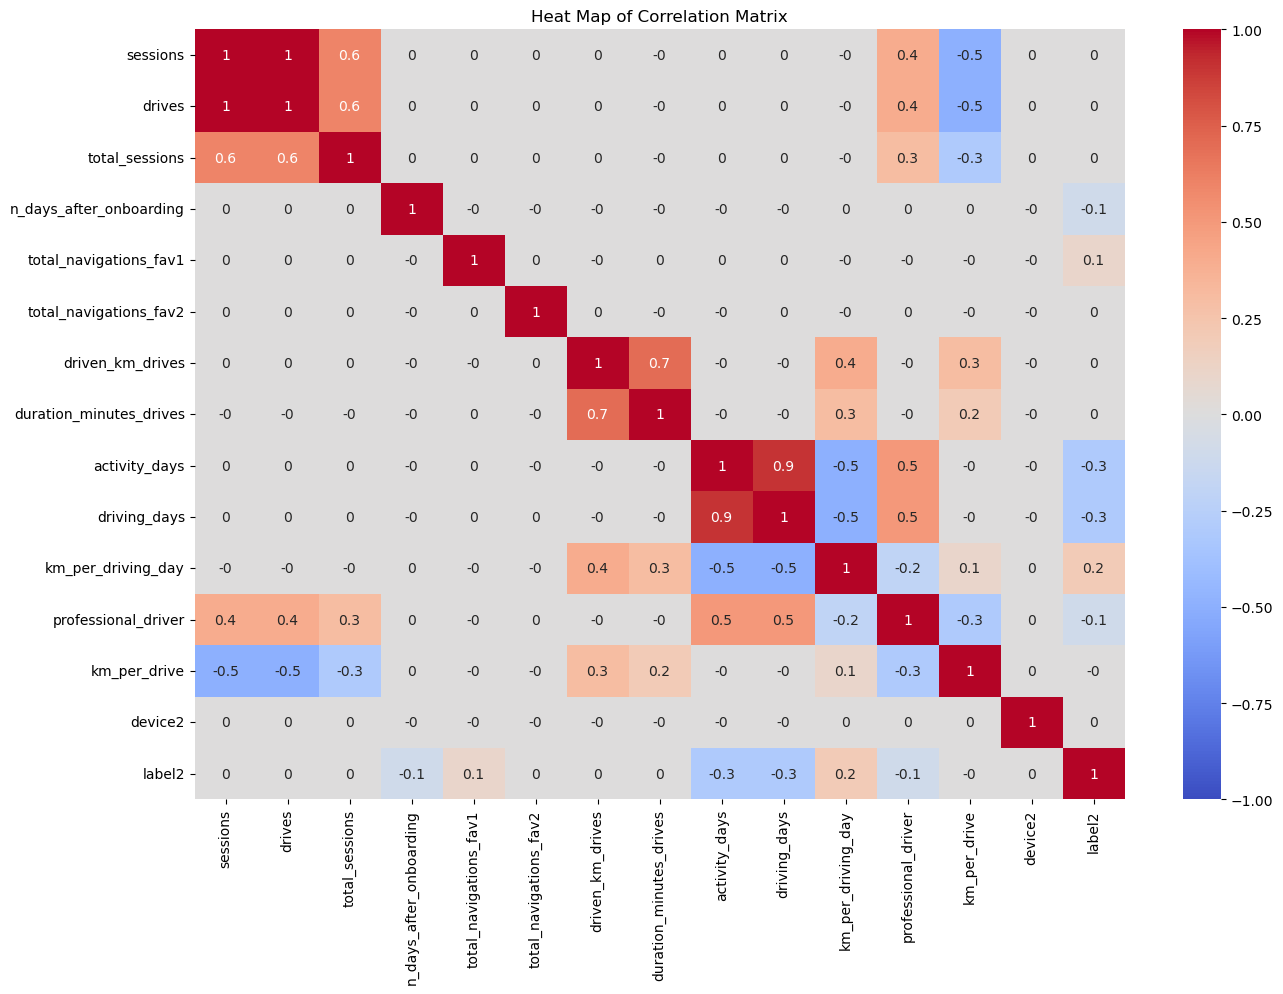

In [860]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(method='pearson', numeric_only=True).round(1),
            vmin =-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Heat Map of Correlation Matrix')
plt.show()

The following variables are multicollinear (when correlation coefficient is greater than 0.7):
* `'sessions'` and `'drives'` with a Pearson correlation coefficient = 1

* `'driving_days'` and `'activity_days'` with a Pearson correlation coefficient = 0.9

* `'driven_km_drives'` and `'duration_minutes_drives'` with a correlation coefficient = 0.7

### **Model building**

#### **Assign predictor variables and target**
Drop the following variables and assign the results to `X`:

* `label` (this is the target)
* `label2` (this is the target)
* `device` (this is the non-binary-encoded categorical variable)
* `sessions` (high multicollinearity)
* `driving_days` (high multicollinearity)
* `duration_minutes_drives` (high multicollinearity) 

In [861]:
# Isolate predictor variables
X = df2.drop(['label', 'label2', 'sessions',
              'duration_minutes_drives', 
              'driving_days', 'device'], axis=1)
X.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,activity_days,km_per_driving_day,professional_driver,km_per_drive,device2
0,200.000000000,296.748272900,2276,208.000000000,0.000000000,2628.845068000,28,138.360266737,1,11.632057823,0
1,107.000000000,326.896596200,1225,19.000000000,64.000000000,8898.716275000,13,1246.901868182,0,128.186173364,1
2,95.000000000,135.522926300,2651,0.000000000,0.000000000,3059.148818000,14,382.393602250,0,32.201566505,0
3,40.000000000,67.589221270,15,322.000000000,7.000000000,913.591123100,7,304.530374367,0,22.839778078,1
4,68.000000000,168.247020100,1562,166.000000000,5.000000000,3950.202008000,27,219.455667111,1,58.091206000,0


In [862]:
# Isolate target variable
y = df2['label2']
y.tail()

14994    0
14995    0
14996    0
14997    1
14998    0
Name: label2, dtype: int32

In [863]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [864]:
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,activity_days,km_per_driving_day,professional_driver,km_per_drive,device2
152,108.000000000,186.192745700,3116,243.000000000,124.000000000,8898.716275000,24,612.305860933,1,85.042480685,1
11899,2.000000000,3.487589936,794,114.000000000,18.000000000,3286.545691000,5,2258.494484350,0,913.878779327,1
10937,139.000000000,347.106403200,331,4.000000000,7.000000000,7400.838975000,15,616.736581250,0,53.243445863,0
669,108.000000000,455.439492390,2320,11.000000000,4.000000000,6566.424830000,18,410.401551875,1,60.800229907,1
8406,10.000000000,89.475820690,2478,135.000000000,0.000000000,1271.248661000,27,74.779333000,0,127.124866100,1


In [865]:
# Instantiate and fit the model
model = LogisticRegression(penalty = None, max_iter=400, random_state = 42)
model.fit(X_train,y_train)

LogisticRegression(max_iter=400, penalty=None, random_state=42)

In [866]:
# Betas of the features
pd.Series(model.coef_[0], index=X.columns)

drives                     0.002198881
total_sessions             0.000362437
n_days_after_onboarding   -0.000401630
total_navigations_fav1     0.001269749
total_navigations_fav2     0.001010204
driven_km_drives           0.000021350
activity_days             -0.103478618
km_per_driving_day         0.000078887
professional_driver       -0.004389980
km_per_drive               0.000118111
device2                    0.019871423
dtype: float64

In [867]:
# Intecept of the model
model.intercept_

array([-0.08631014])

#### **Verificatin of final assumption**

Verification of the linear relationship between X and the estimated log odds (known as logits) by making regplots.

In [868]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.94367716, 0.05632284],
       [0.59335623, 0.40664377],
       [0.75303821, 0.24696179],
       ...,
       [0.92965499, 0.07034501],
       [0.82678764, 0.17321236],
       [0.94247548, 0.05752452]])

In [869]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1]/prob[0]) for prob in training_probabilities]

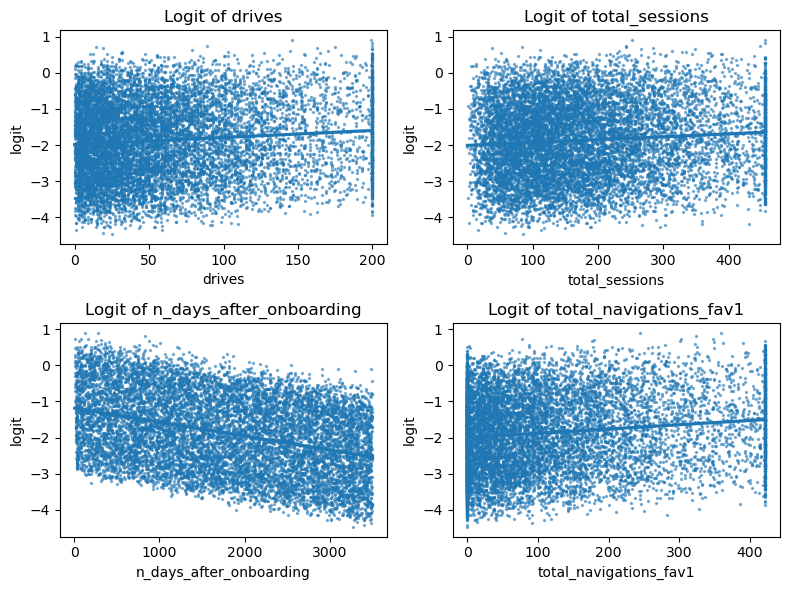

In [870]:
# Draw scatterplots for each pair of independent variable/logit
fig, axs = plt.subplots(2, 2, figsize=(8,6))

sns.regplot(x='drives', y='logit', data=logit_data, scatter_kws={'s': 2,'alpha': 0.5}, ax = axs[0, 0])
axs[0, 0].set_title('Logit of drives')

sns.regplot(x='total_sessions', y='logit', data=logit_data, scatter_kws={'s': 2,'alpha': 0.5}, ax = axs[0, 1])
axs[0, 1].set_title('Logit of total_sessions')

sns.regplot(x='n_days_after_onboarding', y='logit', data=logit_data, scatter_kws={'s': 2,'alpha': 0.5}, ax = axs[1, 0])
axs[1, 0].set_title('Logit of n_days_after_onboarding')

sns.regplot(x='total_navigations_fav1', y='logit', data=logit_data, scatter_kws={'s': 2,'alpha': 0.5}, ax = axs[1, 1])
axs[1, 1].set_title('Logit of total_navigations_fav1')

plt.tight_layout()
plt.show()

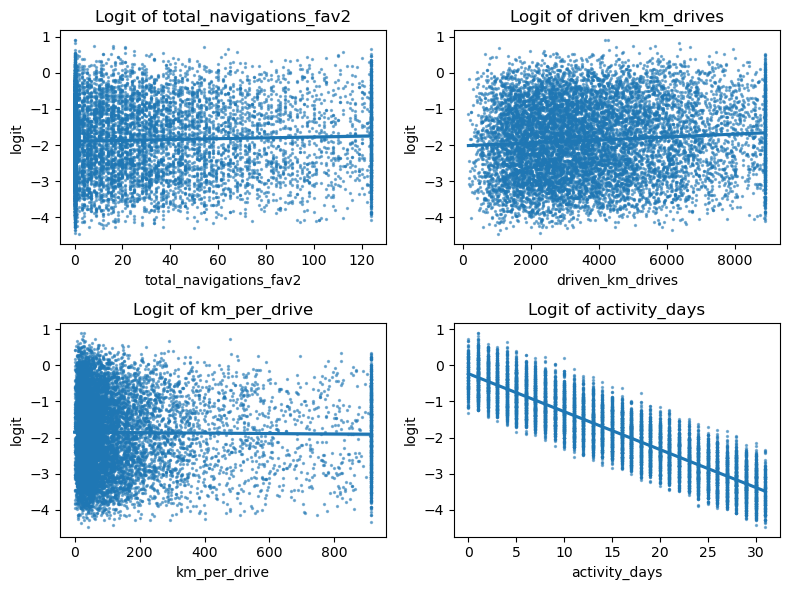

In [871]:
# Draw scatterplots for each pair of independent variable/logit
fig, axs = plt.subplots(2, 2, figsize=(8,6))

sns.regplot(x='total_navigations_fav2', y='logit', data=logit_data, scatter_kws={'s': 2,'alpha': 0.5}, ax = axs[0, 0])
axs[0, 0].set_title('Logit of total_navigations_fav2')

sns.regplot(x='driven_km_drives', y='logit', data=logit_data, scatter_kws={'s': 2,'alpha': 0.5}, ax = axs[0, 1])
axs[0, 1].set_title('Logit of driven_km_drives')

sns.regplot(x='km_per_drive', y='logit', data=logit_data, scatter_kws={'s': 2,'alpha': 0.5}, ax = axs[1, 0])
axs[1, 0].set_title('Logit of km_per_drive')

sns.regplot(x='activity_days', y = 'logit', data=logit_data, scatter_kws={'s': 2,'alpha': 0.5}, ax = axs[1, 1])
axs[1, 1].set_title('Logit of activity_days')

plt.tight_layout()
plt.show()

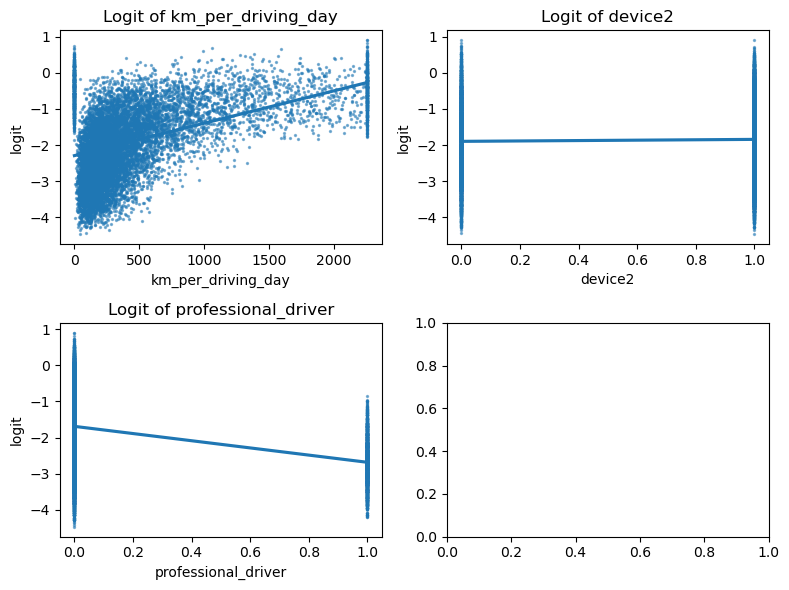

In [872]:
# Draw scatterplots for each pair of independent variable/logit
fig, axs = plt.subplots(2, 2, figsize=(8,6))

sns.regplot(x='km_per_driving_day', y='logit', data=logit_data, scatter_kws={'s': 2,'alpha': 0.5}, ax = axs[0, 0])
axs[0,0 ].set_title('Logit of km_per_driving_day')

sns.regplot(x='device2', y='logit', 
            data=logit_data, scatter_kws={'s': 2,'alpha': 0.5}, ax = axs[0,1])
axs[0,1].set_title('Logit of device2')

sns.regplot(x='professional_driver', y='logit', 
            data=logit_data, scatter_kws={'s': 2,'alpha': 0.5}, ax = axs[1,0])
axs[1,0].set_title('Logit of professional_driver')

plt.tight_layout()
plt.show()

### **Results and evaluation**


In [873]:
# Predictions on X_test
y_preds = model.predict(X_test)

In [874]:
# Score the model (accuracy) on the test data
model.score(X_test, y_test)

0.8246153846153846

### **Show results with a confusion matrix**

In [875]:
cm = confusion_matrix(y_test, y_preds)

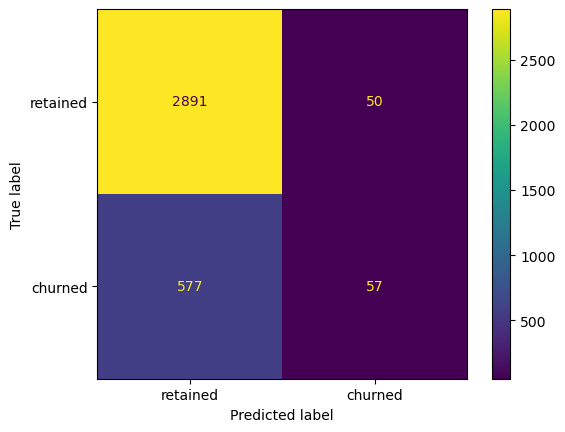

In [876]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained','churned'])

disp.plot()

In [877]:
# Calculate precision manually
precision = cm[1, 1] / (cm[1, 1] + cm [0, 1]) 
precision

0.5327102803738317

In [878]:
# Calculate recall manually
recall = cm[1,1] / (cm[1,1] + cm[1,0])
recall

0.08990536277602523

In [879]:
# Classification report
print(classification_report(y_test, y_preds, target_names=['retained', 'churned']))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.53      0.09      0.15       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



### **Feeatures importance**

In [880]:
# Create a list of (column_name, coefficient) tuples
feature = list(zip(X.columns, model.coef_[0]))

# Sort the list by coefficient value
feature = sorted(feature, key = lambda x: x[1], reverse=True)
feature

[('device2', 0.0198714228861704),
 ('drives', 0.0021988809447882137),
 ('total_navigations_fav1', 0.0012697492306242531),
 ('total_navigations_fav2', 0.0010102042074583155),
 ('total_sessions', 0.0003624367296943435),
 ('km_per_drive', 0.00011811138121683416),
 ('km_per_driving_day', 7.88865772512123e-05),
 ('driven_km_drives', 2.134983203630598e-05),
 ('n_days_after_onboarding', -0.0004016297859462002),
 ('professional_driver', -0.004389979954822785),
 ('activity_days', -0.10347861828148303)]

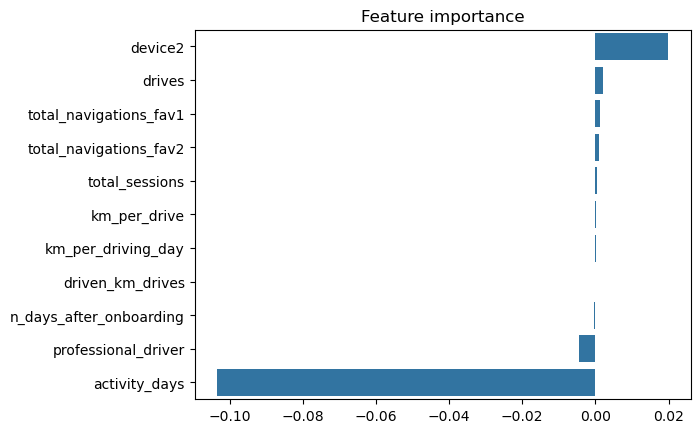

In [881]:
# Plot the feature importances
sns.barplot(x=[x[1] for x in feature],
            y=[x[0] for x in feature])
plt.title('Feature importance')
plt.show()

`activity_days` is the variable that most infleunced the model prediction, it has a negative correlation with user churn, this variable is strongly correlated with driving_days which is also negatively correlated with churn.

In [882]:
result = permutation_importance(model, X_test, y_test, n_repeats = 50, random_state = 42)
importance = result.importances_mean
feature_names = X_test.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importance})

importance_df = importance_df.sort_values(by='importance', ascending=False)
pd.options.display.float_format = '{:.9f}'.format
importance_df

,feature,importance
6,activity_days,0.014741259
2,n_days_after_onboarding,0.005773427
3,total_navigations_fav1,0.002159441
0,drives,0.002053147
7,km_per_driving_day,0.001611189
5,driven_km_drives,0.001079720
1,total_sessions,0.000906294
4,total_navigations_fav2,0.000766434
9,km_per_drive,0.000458741
8,professional_driver,-0.000123077


# **Build a machine learning model**

### **Drop missing values**
Already dropped in Regression modeling section

### **Outliers**
From previous EDA we know many of the columns have outliers. However, tree-based models are resilient to outliers, so there is no need to make any imputations.

### **Variable encoding**
Already performed before in Regression modeling section

### **Feature selection**

Tree-based models can handle multicollinearity, so the only feature that can be cut is `ID` (removed before in Regression modeling section), since it doesn't contain any information relevant to churn.

#### **`total_sessions_per_day`**

A new column that represents the mean number of sessions per day _since onboarding_.

In [883]:
# `total_sessions_per_day` feature
df1['total_sessions_per_day'] = df1['total_sessions'] / df1['n_days_after_onboarding']

In [884]:
# Descriptive stats
df1['total_sessions_per_day'].describe()

count   14299.000000000
mean        0.338207372
std         1.319814289
min         0.000298049
25%         0.050817890
50%         0.100457267
75%         0.215210166
max        39.763874325
Name: total_sessions_per_day, dtype: float64

#### **`km_per_hour`**

A column representing the mean kilometers per hour driven in the last month.

In [885]:
# `km_per_hour` feature
df1['km_per_hour'] = df1['driven_km_drives'] / (df1['duration_minutes_drives'] / 60)

In [887]:
# Descriptive stats
df1['km_per_hour'].describe()

count   14299.000000000
mean      190.730962588
std       339.926138061
min        72.013094564
25%        90.649402389
50%       122.105845317
75%       193.238448648
max     23642.920870858
Name: km_per_hour, dtype: float64

### **Evaluation metric**
This depends on the class balance of the target variable and the use case of the model.


In [888]:
# Class balance of 'label' column
df1['label'].value_counts(normalize=True)

label
retained   0.822644940
churned    0.177355060
Name: proportion, dtype: float64

Approximately 18% of the users in this dataset churned. This is an unbalanced dataset, but not extremely so. It can be modeled without any class rebalancing. 
Accuracy might not be the best gauge of performance because a model can have high accuracy on an imbalanced dataset and still fail to predict the minority class. The best metric for this case is recall because false positives (measured by precision)dont't have a significant impact, while the focus is predicting churn and thus reducing flase negatives.

### **Modeling workflow and model selection process**
1. Split the data into train/validation/test sets (60/20/20)
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)

### **Split the data**

In [889]:
# Isolate X variables
X = df1.copy()
X = X.drop(['device', 'label', 'label2'], axis = 1)

# Isolate y variable
y = df1['label2']

# Split into train and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=0)

# Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, stratify = y_tr, random_state=0)

In [890]:
print(X.shape)
print(X_tr.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(14299, 16)
(11439, 16)
(8579, 16)
(2860, 16)
(2860, 16)


In [891]:
X.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,km_per_drive,device2,total_sessions_per_day,km_per_hour
count,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000,14299.000000000
mean,80.623819848,67.255822085,189.547408517,1751.822505070,121.747394923,29.638296384,4044.401535156,1864.199794075,15.544653472,12.182530247,581.942399205,0.173998182,232.269196575,0.645150010,0.338207372,190.730962588
std,80.736501521,65.947295281,136.189764333,1008.663833851,147.713428402,45.350890443,2504.977970380,1448.005047477,9.016088256,7.833835230,1038.254509215,0.379121176,616.197408609,0.478484572,1.319814289,339.926138061
min,0.000000000,0.000000000,0.220210944,4.000000000,0.000000000,0.000000000,60.441250460,18.282082470,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000298049,72.013094564
25%,23.000000000,20.000000000,90.457732710,878.500000000,10.000000000,0.000000000,2217.319909500,840.181343600,8.000000000,5.000000000,136.168003061,0.000000000,32.486524041,0.000000000,0.050817890,90.649402389
50%,56.000000000,48.000000000,158.718571400,1749.000000000,71.000000000,9.000000000,3496.545617000,1479.394387000,16.000000000,12.000000000,273.301011880,0.000000000,72.947058603,1.000000000,0.100457267,122.105845317
75%,111.000000000,93.000000000,253.540449850,2627.500000000,178.000000000,43.000000000,5299.972162000,2466.928876000,23.000000000,19.000000000,558.018760868,0.000000000,179.347526658,1.000000000,0.215210166,193.238448648
max,743.000000000,596.000000000,1216.154633000,3500.000000000,1236.000000000,415.000000000,21183.401890000,15851.727160000,31.000000000,30.000000000,15420.234110000,1.000000000,15777.426560000,1.000000000,39.763874325,23642.920870858


### **Modeling**
#### **Random forest**

In [892]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state = 42)

# Create a dictionary of hyperparameters to tune
# I have tried before various combinations of parameters and
# the following are the best in terms of recall
cv_params = {'max_features': [18], 
             'n_estimators': [10], 
             'max_depth': [24], 
             'max_samples': [0.9], 
             'min_samples_leaf': [2], 
             'min_samples_split': [2]}

# Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit='recall')

In [893]:
%%time
### YOUR CODE HERE ###
rf_cv.fit(X_train, y_train)

CPU times: total: 2.39 s
Wall time: 2.58 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [24], 'max_features': [18],
                         'max_samples': [0.9], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [10]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [894]:
# Best score
rf_cv.best_score_

0.1485029009531703

In [895]:
# Best hyperparameter combo
rf_cv.best_params_

{'max_depth': 24,
 'max_features': 18,
 'max_samples': 0.9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

In [896]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

  # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'recall': 'mean_test_recall', 
                   'precision': 'mean_test-precision', 
                   'accuracy': 'mean_test_accuracy', 
                   'f1': 'mean_test_f1'}
    
  # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
  # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
  # Extract Accuracy, precision, recall, and f1 score from that row
    accuracy = best_estimator_results['mean_test_accuracy']
    precision = best_estimator_results['mean_test_precision']
    recall = best_estimator_results['mean_test_recall']
    f1 = best_estimator_results['mean_test_f1']

    
  # Create table of results
    table = pd.DataFrame({'model': [model_name], 
                         'precision': [precision], 
                         'recall': [recall], 
                         'f1': [f1], 
                         'accuracy': [accuracy]})
    return table
    

In [897]:
results = make_results('Rendom Forest CV', rf_cv, 'recall')
results

,model,precision,recall,f1,accuracy
0,Rendom Forest CV,0.399109534,0.148502901,0.216213684,0.809418163


#### **XGBoost**

In [898]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective = 'binary:logistic', random_state = 42)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [20], 
             'min_child_weight': [3], 
             'learning_rate': [0.35], 
             'n_estimators': [70]}

# Define a list of scoring metrics to capture
scoring = ['accuracy', 'recall', 'precision', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 4, refit = 'recall')

In [899]:
%%time
# Train model
xgb_cv.fit(X_train, y_train)

CPU times: total: 18.9 s
Wall time: 1.47 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.35], 'max_depth': [20],
                         'min_child_weight': [3], 'n_estimators': [70]},
             refit='recall', scoring=['accuracy', 'recall', 'precision', 'f1'])

In [900]:
# bBest score
xgb_cv.best_score_

0.16754558640696227

In [901]:
# Best parameters
xgb_cv.best_params_

{'learning_rate': 0.35,
 'max_depth': 20,
 'min_child_weight': 3,
 'n_estimators': 70}

In [902]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGBoost CV', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis = 0)
results

,model,precision,recall,f1,accuracy
0,Rendom Forest CV,0.399109534,0.148502901,0.216213684,0.809418163
0,XGBoost CV,0.381579328,0.167545586,0.232582467,0.804055716


### **Model selection**
#### **Random forest**

In [903]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [904]:
# Use random forest model to predict on validation data
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

# Get validation scores for RF model
rf_val_scores = get_test_scores('Random Forest Val', rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis = 0)
results

,model,precision,recall,f1,accuracy
0,Rendom Forest CV,0.399109534,0.148502901,0.216213684,0.809418163
0,XGBoost CV,0.381579328,0.167545586,0.232582467,0.804055716
0,Random Forest Val,0.435897436,0.167652860,0.242165242,0.813986014


#### **XGBoost**

In [905]:
# Use XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGBoost Val', xgb_val_preds, y_val)

# Append to the results table
results = pd.concat([results, xgb_val_scores], axis = 0)
results

,model,precision,recall,f1,accuracy
0,Rendom Forest CV,0.399109534,0.148502901,0.216213684,0.809418163
0,XGBoost CV,0.381579328,0.167545586,0.232582467,0.804055716
0,Random Forest Val,0.435897436,0.167652860,0.242165242,0.813986014
0,XGBoost Val,0.395454545,0.171597633,0.239339752,0.806643357


### **Use champion model to predict on test data**
Overall the performance of the two models is very similar with the random forest model performing marginally better in terms of precision


In [906]:
# Use random forest model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for random forest model
xgb_test_scores = get_test_scores('XGBoost Test', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis = 0)
results

,model,precision,recall,f1,accuracy
0,Rendom Forest CV,0.399109534,0.148502901,0.216213684,0.809418163
0,XGBoost CV,0.381579328,0.167545586,0.232582467,0.804055716
0,Random Forest Val,0.435897436,0.167652860,0.242165242,0.813986014
0,XGBoost Val,0.395454545,0.171597633,0.239339752,0.806643357
0,XGBoost Test,0.368421053,0.179487179,0.241379310,0.800000000


### **Confusion matrix**

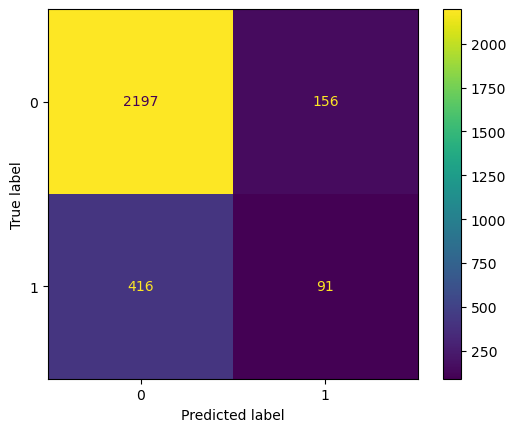

In [907]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels = xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb_cv.classes_)
disp.plot()
plt.show()


### **Feature Importance**

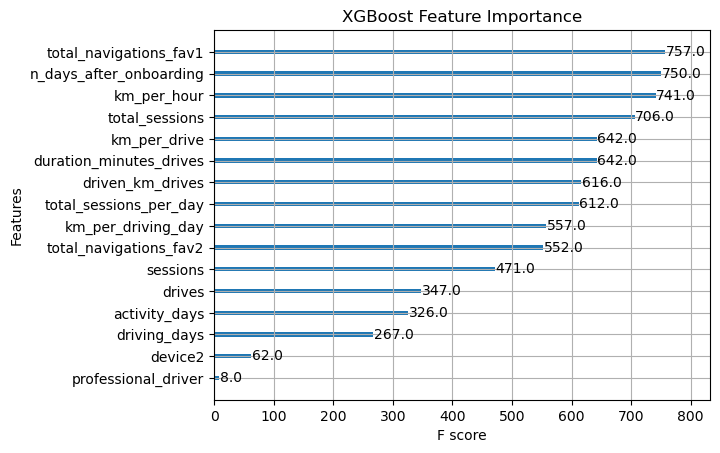

In [908]:
plot_importance(xgb_cv.best_estimator_)
plt.title('XGBoost Feature Importance')
plt.show()

                    Feature  Importance
8             activity_days 0.155110900
3   n_days_after_onboarding 0.105327434
7   duration_minutes_drives 0.081300125
14   total_sessions_per_day 0.075012380
15              km_per_hour 0.073554759
4    total_navigations_fav1 0.073398116
12             km_per_drive 0.066775839
2            total_sessions 0.064899300
10       km_per_driving_day 0.059169564
5    total_navigations_fav2 0.056436961
6          driven_km_drives 0.054741920
1                    drives 0.044459931
0                  sessions 0.043218727
9              driving_days 0.038197586
13                  device2 0.008115262
11      professional_driver 0.000281196


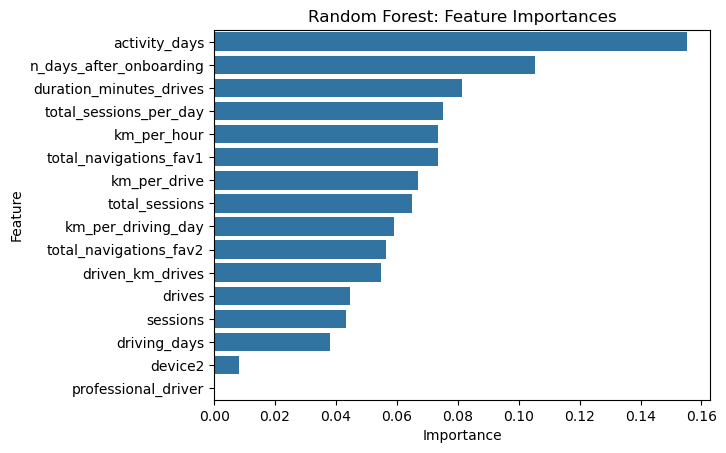

In [909]:
rf_importance = pd.DataFrame({"Feature": X.columns, 
                               "Importance": rf_cv.best_estimator_.feature_importances_})
rf_importance = rf_importance.sort_values("Importance", ascending=False)
print(rf_importance)
sns.barplot(data=rf_importance, x="Importance", y='Feature', orient='h', )

plt.title("Random Forest: Feature Importances", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")

plt.show()

# **Conclusion**
To get the best results three different models were built and tested: logistic regression, random forest and XGBoost. 
By splitting the data into 3 different datasets, the size of each dataset was reduced considerably.  Starting from a dataset that was already quite small this impacts the quality of the training as it is done on a smaller set. However choosing a champion model on the validation set and testing it on the test data improves the estimation of future performance of the model on new data.
The criteria for model selection is the “recall’ metric which helps to better evaluate the false negatives (users predicted not to churn when in reality they churned). 

The random forest model performed marginally better than the XGBoost model, and both performed better than the Logistic regression model. 
The ensembles of tree-based models are more valuable than a singular logistic regression model because they achieve higher scores across all evaluation metrics and require less preprocessing of the data. However, it is more difficult to understand how they make their predictions.
I would not recommend using the champion model for business decisions because its prediction quality is mediocre (recall ~16%). The number of false negatives is high compared to correct predictions of churned.

The results of the analysis evidence that additional  data is necessary to predict churn, given the poor predictive power of existing features
The model could be marginally improved by adding new engineered features, but it appears that the features of the dataset are simply not good predictors. 
It would be helpful to have more detailed data regarding the use of the app by the users, and data on the travels performed, e.g. new destinations counts, geographic locations, etc.

# **Appendix**
#### **Identify an optimal decision threshold**

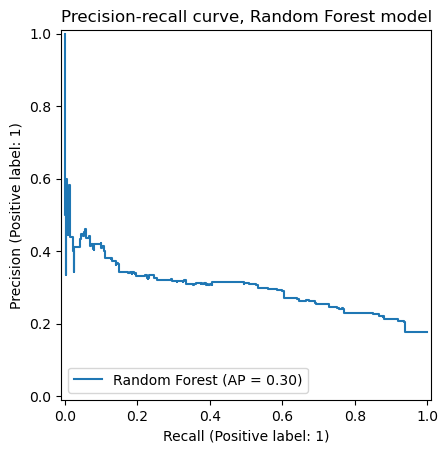

In [910]:
# Plot precision-recall curve
display = PrecisionRecallDisplay.from_estimator(rf_cv.best_estimator_, X_test, y_test, name = 'Random Forest')
plt.title('Precision-recall curve, Random Forest model');

In [911]:
# Get predicted probabilities on the test data
predicted_probabilities = rf_cv.best_estimator_.predict_proba(X_test)
predicted_probabilities

array([[0.95 , 0.05 ],
       [0.775, 0.225],
       [0.6  , 0.4  ],
       ...,
       [0.7  , 0.3  ],
       [0.95 , 0.05 ],
       [0.25 , 0.75 ]])

In [912]:
# Create a list of just the second column values (probability of target)
probs = [x[1] for x in predicted_probabilities]

# Create an array of new predictions that assigns a 1 to any value >= 0.4
new_preds = np.array([1 if x >= 0.4 else 0 for x in probs])
new_preds

array([0, 0, 1, ..., 0, 0, 1])

In [913]:
# Get evaluation metrics for when the threshold is 0.4
get_test_scores('XGB threshold = 0.4', new_preds, y_test)

,model,precision,recall,f1,accuracy
0,XGB threshold = 0.4,0.321041215,0.291913215,0.305785124,0.765034965


In [914]:
# Comapre with previous results
results

,model,precision,recall,f1,accuracy
0,Rendom Forest CV,0.399109534,0.148502901,0.216213684,0.809418163
0,XGBoost CV,0.381579328,0.167545586,0.232582467,0.804055716
0,Random Forest Val,0.435897436,0.167652860,0.242165242,0.813986014
0,XGBoost Val,0.395454545,0.171597633,0.239339752,0.806643357
0,XGBoost Test,0.368421053,0.179487179,0.241379310,0.800000000


In [915]:
def threshold_finder(y_test_data, probabilities, desired_recall):
    '''
    Find the threshold that most closely yields a desired recall score.

    Inputs:
        y_test_data: Array of true y values
        probabilities: The results of the `predict_proba()` model method
        desired_recall: The recall that you want the model to have

    Outputs:
        threshold: The threshold that most closely yields the desired recall
        recall: The exact recall score associated with `threshold`
    '''
    probs = [x[1] for x in probabilities]  # Isolate second column of `probabilities`
    thresholds = np.arange(0, 1, 0.001)    # Set a grid of 1,000 thresholds to test

    scores = []
    for threshold in thresholds:
        # Create a new array of {0, 1} predictions based on new threshold
        preds = np.array([1 if x >= threshold else 0 for x in probs])
        # Calculate recall score for that threshold
        recall = recall_score(y_test_data, preds)
        # Append the threshold and its corresponding recall score as a tuple to `scores`
        scores.append((threshold, recall))

    distances = []
    for idx, score in enumerate(scores):
        # Calculate how close each actual score is to the desired score
        distance = abs(score[1] - desired_recall)
        # Append the (index#, distance) tuple to `distances`
        distances.append((idx, distance))

    # Sort `distances` by the second value in each of its tuples (least to greatest)
    sorted_distances = sorted(distances, key=lambda x: x[1], reverse=False)
    # Identify the tuple with the actual recall closest to desired recall
    best = sorted_distances[0]
    # Isolate the index of the threshold with the closest recall score
    best_idx = best[0]
    # Retrieve the threshold and actual recall score closest to desired recall
    threshold, recall = scores[best_idx]

    return threshold, recall


In [916]:
# Get the predicted probabilities from the champion model
probabilities = xgb_cv.best_estimator_.predict_proba(X_test)

# Call the function
threshold_finder(y_test, probabilities, 0.5)

(0.092, 0.5009861932938856)

In [917]:
# Create an array of new predictions that assigns a 1 to any value >= 0.089
probs = [x[1] for x in probabilities]
new_preds = np.array([1 if x>= 0.089 else 0 for x in probs])

# Get evaluation metrics for when the threshold is 0.089
get_test_scores('XGB, threshold = 0.089', new_preds, y_test)

,model,precision,recall,f1,accuracy
0,"XGB, threshold = 0.089",0.284128746,0.504930966,0.363636364,0.686713287
